In [1]:
import os
os.chdir('../')

In [2]:
from NN.DENSE import DENSE, DataCollector, Optimizer
from NN.common import *
import matplotlib.pyplot as plt
import numpy as np
from lib import dataset_loader, dataset_info, dataset_preprocessing, plot_utility
import seaborn as sns

In [3]:
X, y = dataset_loader.LoadDataset(dataset_info.Dataset.CUP)
X, y, _, _ = DataSplit(X, y, test_size=0.25, seed=1)
X, y, X_val, y_val = DataSplit(X, y, test_size=0.33, seed=1)

In [4]:
def parameter_to_investigate(params, param_to_check, run_metadata_function, X, y, plot_sample=False):        
	mt = ModelDataCollector(DENSE, X, y, params)
	mt.gather_data(run_metadata_function)
	tr_error_list, val_error_list = mt.get_error_curve()
	run_metadata = mt.get_run_metadata()

	res = mt.sensitivity_analysis([param_to_check])

	param_list = [run_metadata[i] for i in range(len(run_metadata)) if run_metadata.index(run_metadata[i]) == i]
	param_ids = [param_list.index(run_metadata[i]) for i in range(len(run_metadata))]
	metadata_ids = []
	for i in range(len(param_list)):
		metadata_ids.append([])
	for i in range(len(param_ids)):
		metadata_ids[param_ids[i]].append(i)

	# plot the first run for each metadata
	plot_utility.plot_multiple_learning_curves("DENSE train err over " + param_to_check, param_list, [tr_error_list[metadata_ids[i][0]] for i in range(len(metadata_ids))])
	plot_utility.plot_multiple_learning_curves("DENSE   val err over " + param_to_check, param_list, [val_error_list[metadata_ids[i][0]] for i in range(len(metadata_ids))])

	if plot_sample:
		for i in range(len(metadata_ids)):
			plot_utility.plot_single_learning_curve("DENSE CUP" + param_to_check, tr_error_list[metadata_ids[i][0]], None, val_error_list[metadata_ids[i][0]], None)

	plt.bar(param_list, res["tr_error_mean"], yerr=res["tr_error_std"], color=sns.color_palette("Blues_d", len(run_metadata)))
	plt.title("DENSE train err over {}".format(param_to_check))
	plt.show()

	plt.bar(param_list, res["val_error_mean"], yerr=res["val_error_std"], color=sns.color_palette("Blues_d", len(run_metadata)))
	plt.title("DENSE val err over {}".format(param_to_check))
	plt.show()

In [5]:
# La lista di valori per ogni elemento di display_param_value_dict deve essere ordinata rispetto a quella di params
def multiple_par_analysis(params, params_to_check, X, y, display_param_name_dict, display_param_value_dict):
	mt = ModelDataCollector(DENSE, X, y, params)
	mt.gather_data(None)
	tr_error_list, val_error_list = mt.get_error_curve()

	param_list = list(params.keys())

	for param in params_to_check:
		# find runs where param differs
		iter_id = param_list.index(param)
		same_param_length = 1
		for i in range(len(param_list) - 1, iter_id, -1):
			same_param_length *= len(params[param_list[i]])

		sample_ids = [same_param_length * i for i in range(len(params[param]))]
		
		param_display_names = [str(display_param_value_dict[param][i]) for i in range(len(params[param]))]

		# plot the first run for each metadata
		plot_utility.plot_multiple_learning_curves("DENSE train err over " + display_param_name_dict[param], param_display_names, [tr_error_list[i] for i in sample_ids])
		plot_utility.plot_multiple_learning_curves("DENSE   val err over " + display_param_name_dict[param], param_display_names, [val_error_list[i] for i in sample_ids])
		
		res = mt.sensitivity_analysis([param])

		plt.bar(param_display_names, res["tr_error_mean"], yerr=res["tr_error_std"], color=sns.color_palette("Blues_d", len(params[param])))
		plt.title(f"DENSE train err over {display_param_name_dict[param]}")
		plt.show()

		plt.bar(param_display_names, res["val_error_mean"], yerr=res["val_error_std"], color=sns.color_palette("Blues_d", len(params[param])))
		plt.title(f"DENSE val err over {display_param_name_dict[param]}")
		plt.show()

Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max nu

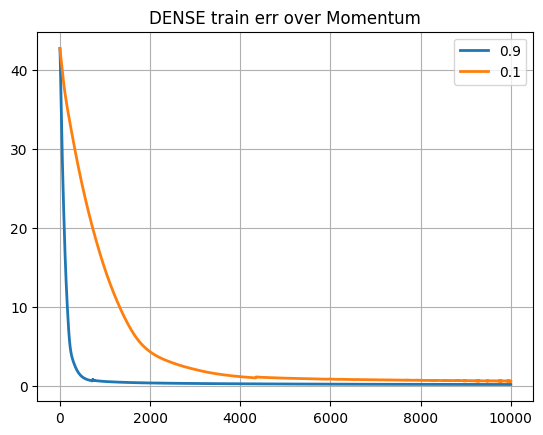

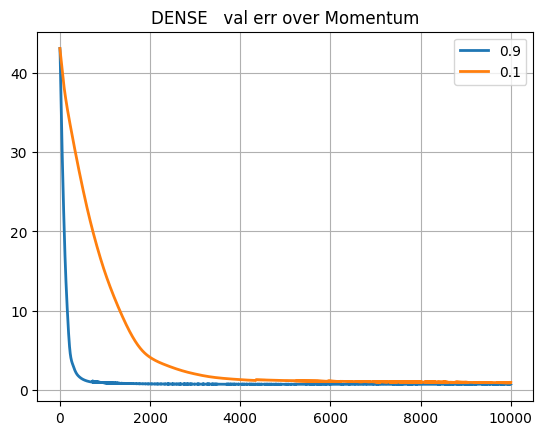

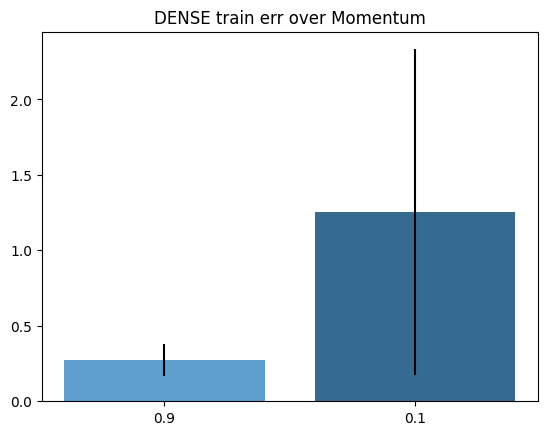

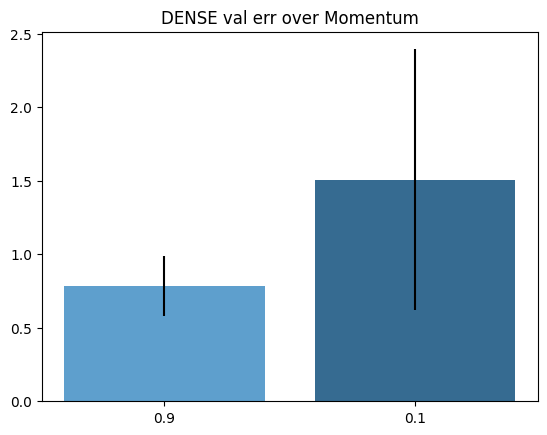

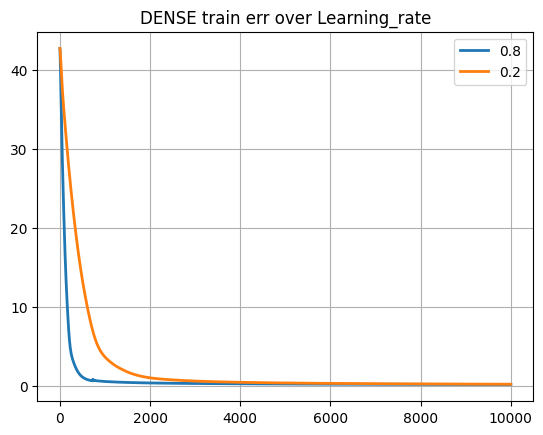

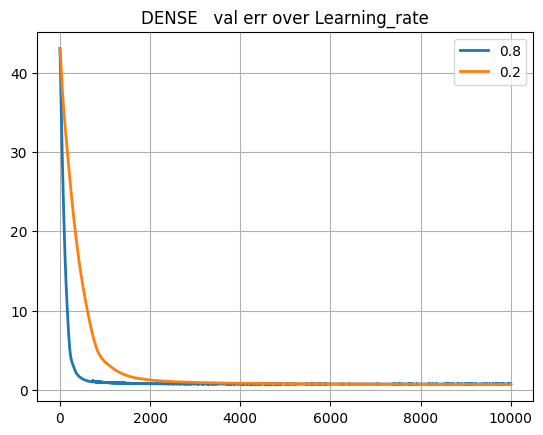

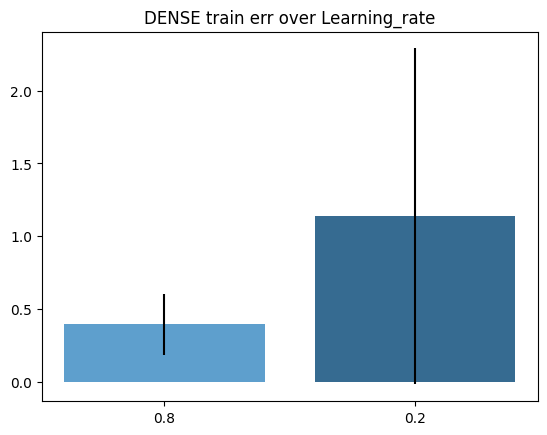

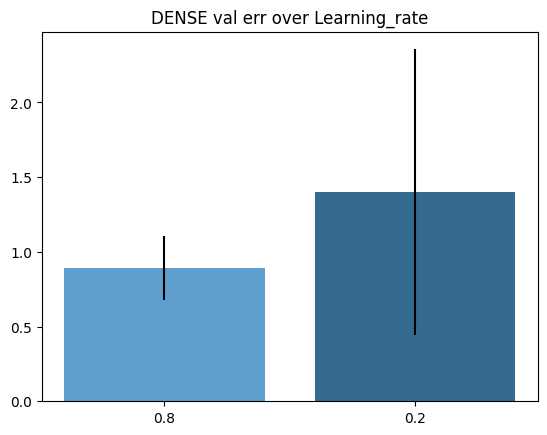

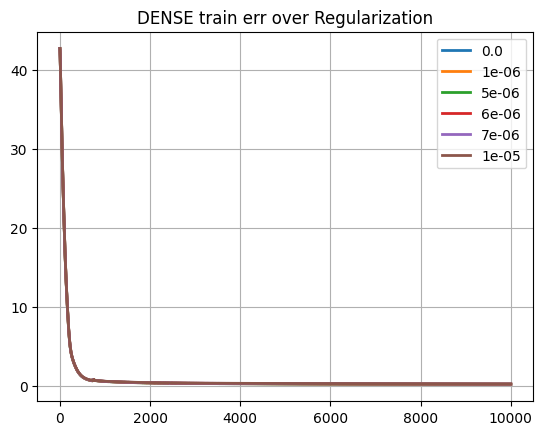

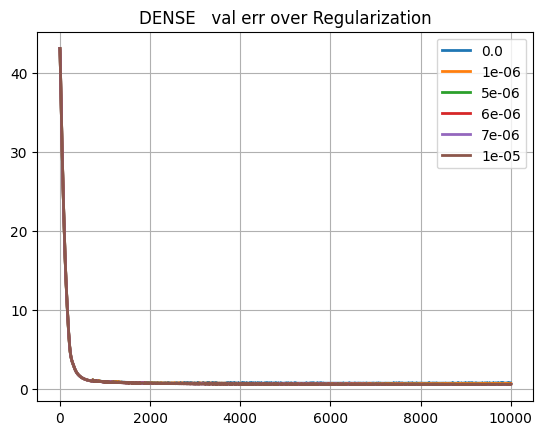

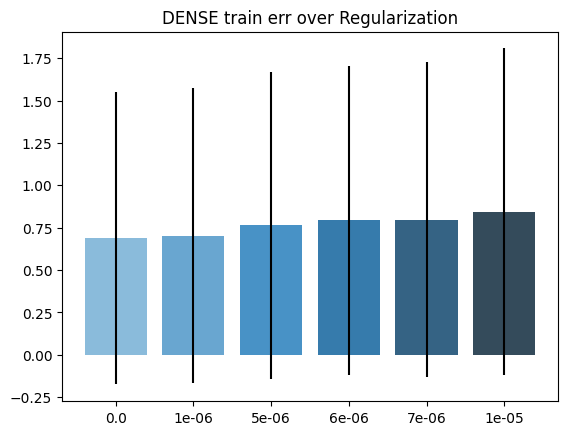

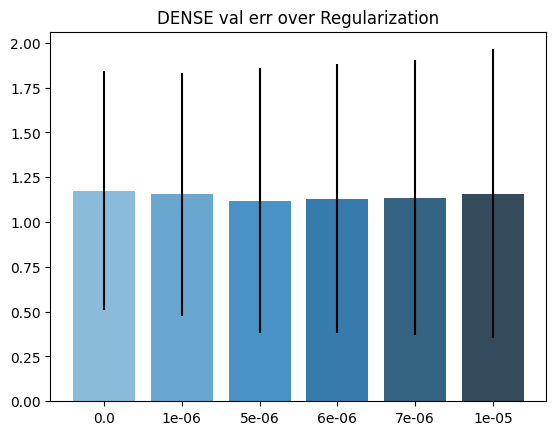

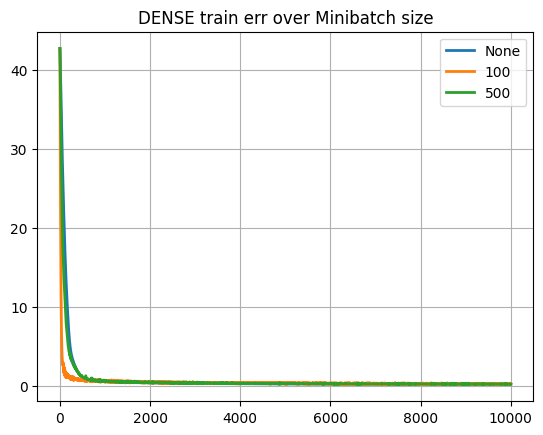

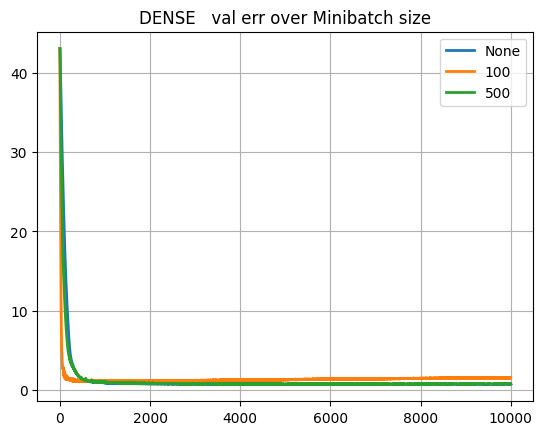

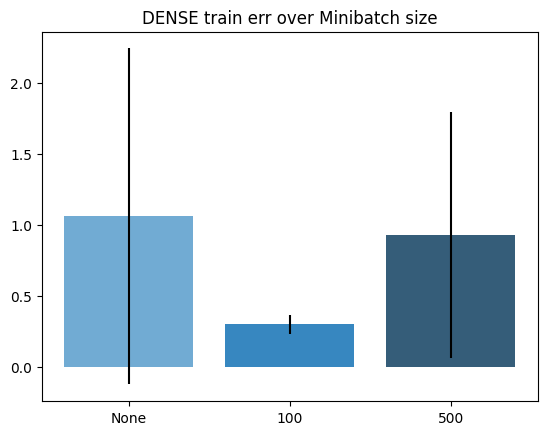

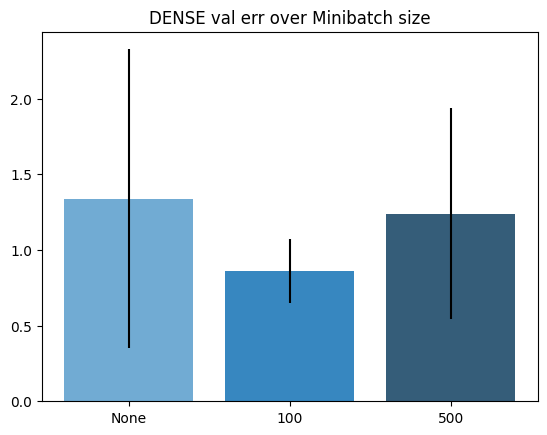

In [10]:
RUN_COUNT = 1

RUN_COUNT = 1

params = {
        'input_units' : [X.shape[1]],
        'output_units' : [y.shape[1]],
        'hidden_layers' : [[(64,ActivationFunction.TANH), (64,ActivationFunction.TANH), (64,ActivationFunction.TANH)]],
        'output_function': [ActivationFunction.LINEAR],
        "momentum" : [0.9, 0.1], #0.9
        'learning_rate': [0.8, 0.2], #0.8
        'regularization': [0.0, 1e-06, 5e-06, 6e-06, 7e-06, 1e-05],
        'epochs' : [10000],
        'minibatch_size': [None, 100, 500],
        'loss_function': [LossFunction.MEE],
        'val_X': [X_val],
        'val_y': [y_val],
        'seed': list(range(RUN_COUNT)),
        'val_patience': [20],
        #'val_min_improvement': [0.00002],
}


params_to_check = ['momentum', 'learning_rate', 'regularization', 'minibatch_size']
par_name_dict = { 
    'momentum': 'Momentum', 
    'minibatch_size': 'Minibatch size',
    'regularization': 'Regularization',
    'learning_rate': 'Learning_rate'
}
par_val_dict = {
    'momentum': params['momentum'], 
    'minibatch_size': params['minibatch_size'],
    'regularization': params['regularization'],
    'learning_rate': params['learning_rate']
}
multiple_par_analysis(params, params_to_check, X, y, par_name_dict, par_val_dict)